### Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_state(wval, bval, data1, data2, title_str='Data'):
    # function for scattering data and drawing classification boundary
    # wx - b > 0 or  wx - b < 0
    
    # create a figure and axis
    fig, ax = plt.subplots()

    # Scatter data points in 2-dimensional space
    ax.scatter(data1[:,0], data1[:,1], label='class 1', c='red', alpha=.3)
    ax.scatter(data2[:,0], data2[:,1], label='class 2', marker='^', c='blue', alpha=.3)
    # set a title and labels
    ax.set_title(title_str)
    ax.legend()
    
    [x1min,x1max,x2min,x2max] = ax.axis()
    x1vals = np.arange(x1min,x1max,0.1)
    ax.plot(x1vals, (-wval[0]*x1vals + bval)/wval[1], 'k')
    ax.axis([x1min,x1max,x2min,x2max])
    ax.grid()

In [3]:
def logistic_function(t):
    # example: logistic_function(np.array([0,1,2]))
    
    ret_val = 1/(1 + np.exp(-t))
    return ret_val

In [4]:
def get_loss(labels, fs):
    loss_val = np.sum(labels*np.log(fs) + (1 - labels)*np.log(1 - fs))
    return loss_val

### Data generation

In [5]:
# generate two Gaussians (class 1 & class 2)
dim = 2
datanum1 = 50
datanum2 = 50
mean1 = np.array([0, 0])
mean2 = np.array([1, -.5])
cov1 = np.array([[.1,.02],[.02,.1]])
cov2 = np.array([[.1,.02],[.02,.1]])
data1 = np.random.multivariate_normal(mean1, cov1, datanum1)
data2 = np.random.multivariate_normal(mean2, cov2, datanum2)
tstdatanum1 = 100
tstdatanum2 = 100
tstdata1 = np.random.multivariate_normal(mean1, cov1, tstdatanum1)
tstdata2 = np.random.multivariate_normal(mean2, cov2, tstdatanum2)

##Pytrch Implementation

Dates: 2022-3-12

Author: Iljung Kim

In [6]:
import torch
import torch.nn as nn

import torch.optim as optim

In [7]:
class logistic_regression(nn.Module):
    def __init__(self):
        super(logistic_regression, self).__init__()
        self.logistic_regression = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
      
    def forward(self, x):
      x = self.logistic_regression(x)
      return x

In [8]:
torch_model = logistic_regression().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.1, )

In [9]:
x_train = np.concatenate((data1, data2), axis=0)
y_train = np.concatenate((np.ones(datanum1), np.zeros(datanum2)))  # label of class 1: 1, label of class 2: 0
x_test = np.concatenate((tstdata1, tstdata2), axis=0)
y_test = np.concatenate((np.ones(tstdatanum1), np.zeros(tstdatanum2)))


In [10]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float).cuda()
y_train_tensor = torch.tensor(y_train, dtype=torch.float).view(-1, 1).cuda()
x_test_tensor = torch.tensor(x_test, dtype=torch.float).cuda()
y_test_tensor = torch.tensor(y_test, dtype=torch.float).view(-1, 1).cuda()

In [11]:
list(torch_model.parameters())

[Parameter containing:
 tensor([[ 0.6182, -0.1981]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.2389], device='cuda:0', requires_grad=True)]

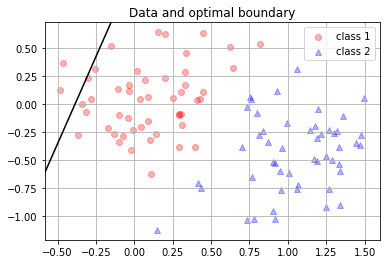

In [12]:
init_w = list(torch_model.parameters())[0].detach().cpu().numpy()[0]
init_b = -list(torch_model.parameters())[1].item()
draw_state(init_w, init_b, data1, data2, 'Data and optimal boundary')

In [13]:
import time

start_time = time.time()
train_history = []
test_history = []

n_epochs = 500
for epoch in range(0, n_epochs):
    output = torch_model(x_train_tensor)
    train_loss = criterion(output, y_train_tensor)
    train_history.append(train_loss.item())

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    with torch.no_grad():
        output = torch_model(x_test_tensor)
        test_loss = criterion(output, y_test_tensor)
        test_history.append(test_loss.item())

    
    print(f'[Epoch {epoch + 1:3d}/{n_epochs}] [Train loss: {train_loss.item():.6f}] [Test loss: {test_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]')

[Epoch   1/500] [Train loss: 0.928636] [Test loss: 0.910122] [Elapsed time: 0.09s]
[Epoch   2/500] [Train loss: 0.910299] [Test loss: 0.892822] [Elapsed time: 0.09s]
[Epoch   3/500] [Train loss: 0.892783] [Test loss: 0.876283] [Elapsed time: 0.09s]
[Epoch   4/500] [Train loss: 0.876062] [Test loss: 0.860479] [Elapsed time: 0.09s]
[Epoch   5/500] [Train loss: 0.860106] [Test loss: 0.845379] [Elapsed time: 0.10s]
[Epoch   6/500] [Train loss: 0.844885] [Test loss: 0.830957] [Elapsed time: 0.10s]
[Epoch   7/500] [Train loss: 0.830370] [Test loss: 0.817182] [Elapsed time: 0.10s]
[Epoch   8/500] [Train loss: 0.816528] [Test loss: 0.804025] [Elapsed time: 0.10s]
[Epoch   9/500] [Train loss: 0.803330] [Test loss: 0.791457] [Elapsed time: 0.10s]
[Epoch  10/500] [Train loss: 0.790743] [Test loss: 0.779449] [Elapsed time: 0.10s]
[Epoch  11/500] [Train loss: 0.778737] [Test loss: 0.767971] [Elapsed time: 0.11s]
[Epoch  12/500] [Train loss: 0.767282] [Test loss: 0.756997] [Elapsed time: 0.11s]
[Epo

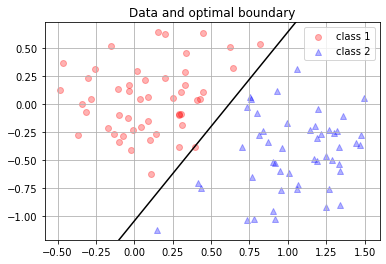

In [14]:
opt_w = list(torch_model.parameters())[0].detach().cpu().numpy()[0]
opt_b = -list(torch_model.parameters())[1].item()
draw_state(opt_w, opt_b, data1, data2, 'Data and optimal boundary')

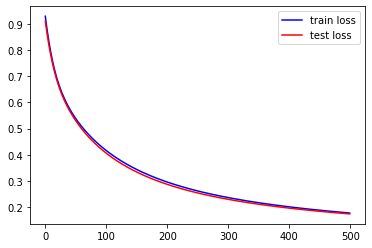

In [16]:
fig, ax = plt.subplots()
ax.plot(train_history, 'b', label='train loss')
ax.plot(test_history, 'r', label='test loss')
ax.legend()

In [17]:
with torch.no_grad():
  output = torch_model(x_test_tensor).cpu()
  output = np.round(output).cuda()
print(f'Accuracy: {(sum(y_test_tensor == output) / output.size(0) * 100).item():.2f}%')

Accuracy: 97.00%
